In [1]:
import numpy as np
import os
import pickle

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(os.path.abspath('../'))

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
DATA_DIR = '/mlodata1/jb/data/'

In [3]:
epsilon = os.path.join(DATA_DIR, 'epsilon.pickle')
with open(epsilon, 'rb') as f:
    X_eps, y_eps = pickle.load(f)

In [39]:
rcv1 = os.path.join(DATA_DIR, 'rcv1.pickle')
with open(rcv1, 'rb') as f:
    X_rcv1, y_rcv1 = pickle.load(f)

## epsilon

In [17]:
np.random.seed(2018)
n = X_eps.shape[0]
sub_idx = np.random.choice(n, int(n/10), replace=True)

In [18]:
X_eps_down = X_eps[sub_idx, :]

In [19]:
y_eps_down = y_eps[sub_idx]

In [59]:
from parameters import Parameters
from logistic import LogisticSGD

In [5]:
from experiment import run_experiment

In [47]:
with open('eps_sub.pickle', 'wb+') as f:
    pickle.dump([X_eps_down, y_eps_down], f)

In [61]:
# For normal SGD bottou final
# best is lr = 1.0
n = 400000
params = []

for lr in [0.001, 0.01, 0.1, 1., 10.]:
    params.append(Parameters(name="full-sgd", num_epoch=5, lr_type='bottou', initial_lr=lr, tau=1,
                       regularizer=1 / n, estimate='final'))

run_experiment('eps-param-search', 'eps_sub.pickle', params, nproc=10)

load dataset
start experiment
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3238945007324219s
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.25631141662597656s
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.2691929340362549s
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.33409810066223145s
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.29005861282348633s
full-sgd t 4000 epoch 0 iter 4000 loss 0.6922457535157459 elapsed 4.949071168899536s
full-sgd t 4000 epoch 0 iter 4000 loss 0.6846614174879849 elapsed 4.879122495651245s
full-sgd t 4000 epoch 0 iter 4000 loss 0.4414427717567114 elapsed 4.923094987869263s
full-sgd t 4000 epoch 0 iter 4000 loss 0.6287604274117882 elapsed 5.369031190872192s
full-sgd t 4000 epoch 0 iter 4000 loss 1.010312153474591 elapsed 5.204900026321411s
full-sgd t 8000 epoch 0 iter 8000 loss 0.3752743440315522 elapsed 8.192138671875s
full-sgd t 8000 epoch 0 iter 8000 loss 0.6912862121473468 ela

In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_svmlight_file
import numpy as np
import pickle
import glob
import os

from matplotlib.ticker import MaxNLocator

from utils import unpickle_dir

LOG_SCALE = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
baselines = unpickle_dir('sync-sparsifiedSGD/results/paper_data/baselines')['baselines']
baselines

{'Covtypes': 0.53822905525790754,
 'Covtypes-1e-4': 0.53395379016795852,
 'RCV1': 0.27580805295951311,
 'RCV1-1e-4': 0.34549696431571941,
 'RCV1-test': 0.10052941755304266,
 'RCV1-test-1e-4': 0.34478356577722369,
 'epsilon': 0.30517591862848087,
 'epsilon-1e-4': 0.54810562551570663}

[Parameter('full-sgd0'), Parameter('full-sgd1'), Parameter('full-sgd2'), Parameter('full-sgd3'), Parameter('full-sgd4')]


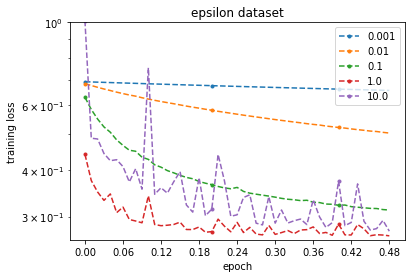

In [74]:
def plot_epsilon(ax):
    data = unpickle_dir('eps-param-search')
    for i in range(len(data['params'])):
        data['params'][i].name += str(i) 
    print(data['params'])

    markers_every = 20
    lrs = [0.001, 0.01, 0.1, 1., 10.]
    show = {'full-sgd{}'.format(i): ("C{}.--".format(i), lr) for i, lr in enumerate(lrs)}
#     show = {
#         "full-sgd0": ("C0.--", None),
#         "full-sgd1": ("C1.--", None),
#         "full-sgd2": ("C2.--", None),
#         "full-sgd3": ("C3.--", None),
#         "full-sgd4": ("C4.--", None),
# #         "rand1-M2": ("C1s-", "k=1"),
# #         "rand1-M2-no-shift": ("C1s--", None),
# #         "rand2-M2": ("C2x-", "k=2"),
# #         "rand2-M2-no-shift": ("C2x--", None),
# #         "rand3-M2": ("C3d-", "k=3"),
# #         "rand3-M2-no-shift": ("C3d--", None),
# #         "top1-M2": ("C4*-", None),
# #         "top1-M2-no-shift": ("C4*--", None),
#     }
#     ax.plot([], [], 'C0.-', label='k=d')

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
        loss =loss[1:-1]
        if p.name in show:
            style, label = show[p.name]
            ax.plot(np.arange(len(loss)) / 100, loss, style, label=label, markevery=markers_every)

#     ax.plot([], [], 'C4*-', label='top k=1')
#     ax.plot([], [], color='black', linestyle='--', label="without delay")
#     ax.axhline(baselines['epsilon'], color='black', linestyle=':', label='baseline')
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim([0.26, 1.]);
    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

In [75]:
# For normal SGD bottou final
# best is lr = 1.0
n = 400000
params = []

for lr in [0.001, 0.01, 0.1, 1., 10.]:
    params.append(Parameters(name="top1-{}".format(lr), num_epoch=7, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=1, take_top=True, with_memory=True))
    params.append(Parameters(name="rand1-{}".format(lr), num_epoch=7, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=1, take_top=False, with_memory=True))

run_experiment('eps-param-search-1sparse', 'eps_sub.pickle', params, nproc=10)

load dataset
start experiment
top1-0.001 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3625001907348633s
top1-0.01 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.35720348358154297s
rand1-0.01 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.4517366886138916s
top1-10.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.31493139266967773s
rand1-1.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.28092432022094727s
rand1-0.001 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.37927746772766113s
top1-1.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.44579386711120605s
top1-0.1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.5016274452209473s
rand1-0.1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.4181795120239258s
rand1-10.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3073415756225586s
top1-0.01 t 4000 epoch 0 iter 4000 loss 0.6850149684114625 elapsed 4.490936040878296s
top1-0.001 t 4000 epoch 0 iter 4000 loss 0.6922858911346315 elapse

[Parameter('top1-0.001'), Parameter('rand1-0.001'), Parameter('top1-0.01'), Parameter('rand1-0.01'), Parameter('top1-0.1'), Parameter('rand1-0.1'), Parameter('top1-1.0'), Parameter('rand1-1.0'), Parameter('top1-10.0'), Parameter('rand1-10.0')]


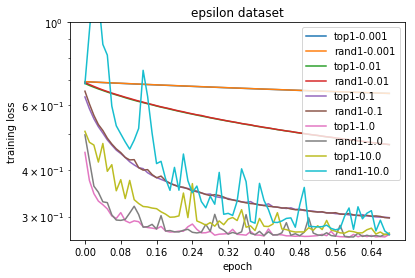

In [77]:
def plot_epsilon(ax):
    data = unpickle_dir('eps-param-search-1sparse')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
        loss =loss[1:-1]
        ax.plot(np.arange(len(loss)) / 100, loss, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim([0.26, 1.]);
    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

In [79]:
# For normal SGD bottou final
# best is lr = 1.0
n = 400000
params = []

for lr in [0.01, 0.1, 1., 10.]:
    params.append(Parameters(name="qsgd-8bit-{}".format(lr), num_epoch=7, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 8))
    params.append(Parameters(name="qsgd-4bit-{}".format(lr), num_epoch=7, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 4))
    params.append(Parameters(name="qsgd-2bit-{}".format(lr), num_epoch=7, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 2))
                  
run_experiment('eps-param-search-qsgd', 'eps_sub.pickle', params, nproc=12)

load dataset
start experiment
qsgd-8bit-1.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3526425361633301s
qsgd-4bit-0.1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3532264232635498s
qsgd-4bit-0.01 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.5323770046234131s
qsgd-2bit-0.1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.5885255336761475s
qsgd-2bit-10.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.35339856147766113s
qsgd-8bit-0.01 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.5903182029724121s
qsgd-4bit-10.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.4524855613708496s
qsgd-4bit-1.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.4261796474456787s
qsgd-2bit-1.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.41995739936828613s
qsgd-8bit-0.1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.8050844669342041s
qsgd-8bit-10.0 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.6028425693511963s
qsgd-2bit-0.01 t 0 epoch 0 i

[Parameter('qsgd-8bit-0.01'), Parameter('qsgd-4bit-0.01'), Parameter('qsgd-2bit-0.01'), Parameter('qsgd-8bit-0.1'), Parameter('qsgd-4bit-0.1'), Parameter('qsgd-2bit-0.1'), Parameter('qsgd-8bit-1.0'), Parameter('qsgd-4bit-1.0'), Parameter('qsgd-2bit-1.0'), Parameter('qsgd-8bit-10.0'), Parameter('qsgd-4bit-10.0'), Parameter('qsgd-2bit-10.0')]


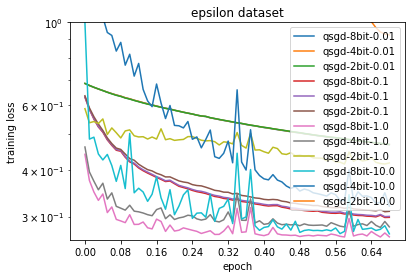

In [80]:
def plot_epsilon(ax):
    data = unpickle_dir('eps-param-search-qsgd')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
        loss =loss[1:-1]
        ax.plot(np.arange(len(loss)) / 100, loss, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim([0.26, 1.]);
    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

In [ ]:
# For normal SGD bottou final
# best is lr = 1.0
n = 400000
params = []

num_epoch=10
lr=1.
params.append(Parameters(name="full-sgd", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final'))
params.append(Parameters(name="qsgd-8bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 8))
params.append(Parameters(name="qsgd-4bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 4))
params.append(Parameters(name="qsgd-2bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 2))
params.append(Parameters(name="top1", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        take_k=1, take_top=True, with_memory=True))
params.append(Parameters(name="rand1", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        take_k=1, take_top=False, with_memory=True))
                  
run_experiment('eps-quantized', 'eps_sub.pickle', params, nproc=12)

load dataset
start experiment
rand1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.3018519878387451s
top1 t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.308321475982666s
qsgd-8bit t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.2975597381591797s
qsgd-4bit t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.32901668548583984s
full-sgd t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.32140588760375977s
qsgd-2bit t 0 epoch 0 iter 0 loss 0.6931358379618792 elapsed 0.2958407402038574s
top1 t 4000 epoch 0 iter 4000 loss 0.4467677542079796 elapsed 4.437626123428345s
rand1 t 4000 epoch 0 iter 4000 loss 0.4980341348345943 elapsed 4.918488025665283s
qsgd-8bit t 4000 epoch 0 iter 4000 loss 0.44151247396960236 elapsed 6.016662120819092s
full-sgd t 4000 epoch 0 iter 4000 loss 0.4414427717567114 elapsed 3.5737483501434326s
qsgd-4bit t 4000 epoch 0 iter 4000 loss 0.461965655159324 elapsed 4.854548215866089s
qsgd-2bit t 4000 epoch 0 iter 4000 loss 0.5858164672615918 elapsed 5.414

[Parameter('full-sgd'), Parameter('qsgd-8bit'), Parameter('qsgd-4bit'), Parameter('qsgd-2bit'), Parameter('top1'), Parameter('rand1')]


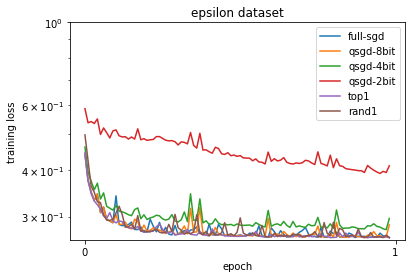

In [5]:
def plot_epsilon(ax):
    data = unpickle_dir('eps-quantized')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
        loss =loss[1:-1]
        ax.plot(np.arange(len(loss)) / 100, loss, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim([0.26, 1.]);
    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

## Full dataset

In [8]:
# For normal SGD bottou final
# best is lr = 1.0
from parameters import Parameters
from logistic import LogisticSGD
from experiment import run_experiment

n = 400000
params = []

num_epoch=5
lr=1.
params.append(Parameters(name="full-sgd", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final'))
params.append(Parameters(name="qsgd-8bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 8))
params.append(Parameters(name="qsgd-4bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 4))
params.append(Parameters(name="qsgd-2bit", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        qsgd_s=2 ** 2))
params.append(Parameters(name="top1", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        take_k=1, take_top=True, with_memory=True))
params.append(Parameters(name="rand1", num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                   regularizer=1 / n, estimate='final',
                        take_k=1, take_top=False, with_memory=True))
                  
run_experiment('eps-quantized', '/mlodata1/jb/data/epsilon_normalized_1.pickle', params, nproc=12)

load dataset
start experiment
qsgd-4bit t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 4.233860492706299s
full-sgd t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 3.2553045749664307s
qsgd-2bit t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 11.621201515197754s
rand1 t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 11.603033065795898s
top1 t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 11.567545413970947s
qsgd-8bit t 0 epoch 0 iter 0 loss 0.6932609436466797 elapsed 5.546124219894409s
full-sgd t 40000 epoch 0 iter 40000 loss 0.3109629753652701 elapsed 52.4127459526062s
qsgd-4bit t 40000 epoch 0 iter 40000 loss 0.33388460873466197 elapsed 58.53462100028992s
rand1 t 40000 epoch 0 iter 40000 loss 0.3378131496923169 elapsed 63.28683567047119s
top1 t 40000 epoch 0 iter 40000 loss 0.3101258685197905 elapsed 63.93951654434204s
qsgd-2bit t 40000 epoch 0 iter 40000 loss 0.5265198137325504 elapsed 65.99028134346008s
qsgd-8bit t 40000 epoch 0 iter 40000 loss 0.3109797262079328 elaps

Process ForkPoolWorker-3:
Process ForkPoolWorker-10:


KeyboardInterrupt: 

# RCV1

In [45]:
np.random.seed(2018)
n = X_rcv1.shape[0]
print(n)
sub_idx = np.random.choice(n, int(n/10), replace=True)

677399


In [41]:
X_rcv1_down = X_rcv1[sub_idx, :]
y_rcv1_down = y_rcv1[sub_idx]

In [42]:
X_rcv1_down.shape, y_rcv1_down.shape

((67739, 47236), (67739,))

In [43]:
with open('../data/rcv1_sub.pickle', 'wb') as f:
    pickle.dump([X_rcv1_down, y_rcv1_down], f)

In [ ]:
num_epoch=3
for lr in [0.01, 0.1, 1., 10.]:
    params.append(Parameters(name="full-sgd-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final'))
    params.append(Parameters(name="qsgd-8bit-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 8))
    params.append(Parameters(name="qsgd-4bit-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 4))
    params.append(Parameters(name="qsgd-2bit-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            qsgd_s=2 ** 2))
    params.append(Parameters(name="top1-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=1, take_top=True, with_memory=True))
    params.append(Parameters(name="rand1-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=1, take_top=False, with_memory=True))
    params.append(Parameters(name="top10-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=10, take_top=True, with_memory=True))
    params.append(Parameters(name="rand10-{}".format(lr), num_epoch=num_epoch, lr_type='bottou', initial_lr=lr,
                       regularizer=1 / n, estimate='final',
                            take_k=10, take_top=False, with_memory=True))
                  
run_experiment('rcv1-parameters-search', 'rcv1_sub.pickle', params, nproc=32)

load dataset
start experiment
qsgd-4bit-0.1 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.11768770217895508s
qsgd-4bit t 0 epoch 0 iter 0 loss 0.6931454019540036 elapsed 0.11075758934020996s
top1-0.01 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.09411358833312988s
top1-1.0 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.11225247383117676s
top10-0.1 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.09449005126953125s
top1 t 0 epoch 0 iter 0 loss 0.6931454019540036 elapsed 0.13340520858764648s
top1-0.1 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.09008383750915527s
full-sgd-0.1 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.0728294849395752s
top10-1.0 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.13527178764343262s
full-sgd t 0 epoch 0 iter 0 loss 0.6931454019540036 elapsed 0.12044310569763184s
full-sgd-10.0 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.11536765098571777s
full-sgd-1.0 t 0 epoch 0 iter 0 loss 0.6931429496157285 elapsed 0.

In [21]:
LOSS_PER_EPOCH = 10
int(X_rcv1_down.shape[0] / LOSS_PER_EPOCH)

0

In [17]:
X_rcv1_down.shape[0]

NameError: name 'X_rcv1_down' is not defined

In [25]:
from parameters import Parameters

In [27]:
ll = [ "full-sgd-0.01", "qsgd-8bit-0.01", "qsgd-4bit-0.01", "qsgd-2bit-0.01", "top1-0.01", "rand1-0.01", "top10-0.01", "rand10-0.01", "full-sgd-0.1", "qsgd-8bit-0.1", "qsgd-4bit-0.1", "qsgd-2bit-0.1", "top1-0.1", "rand1-0.1", "top10-0.1", "rand10-0.1", "full-sgd-1.0", "qsgd-8bit-1.0", "qsgd-4bit-1.0", "qsgd-2bit-1.0", "top1-1.0", "rand1-1.0", "top10-1.0", "rand10-1.0", "full-sgd-10.0", "qsgd-8bit-10.0", "qsgd-4bit-10.0", "qsgd-2bit-10.0", "top1-10.0", "rand1-10.0", "top10-10.0", "rand10-10.0"]

[Parameter('full-sgd'), Parameter('qsgd-8bit'), Parameter('qsgd-4bit'), Parameter('qsgd-2bit'), Parameter('top1'), Parameter('rand1'), Parameter('full-sgd-0.01'), Parameter('qsgd-8bit-0.01'), Parameter('qsgd-4bit-0.01'), Parameter('qsgd-2bit-0.01'), Parameter('top1-0.01'), Parameter('rand1-0.01'), Parameter('top10-0.01'), Parameter('rand10-0.01'), Parameter('full-sgd-0.1'), Parameter('qsgd-8bit-0.1'), Parameter('qsgd-4bit-0.1'), Parameter('qsgd-2bit-0.1'), Parameter('top1-0.1'), Parameter('rand1-0.1'), Parameter('top10-0.1'), Parameter('rand10-0.1'), Parameter('full-sgd-1.0'), Parameter('qsgd-8bit-1.0'), Parameter('qsgd-4bit-1.0'), Parameter('qsgd-2bit-1.0'), Parameter('top1-1.0'), Parameter('rand1-1.0'), Parameter('top10-1.0'), Parameter('rand10-1.0'), Parameter('full-sgd-10.0'), Parameter('qsgd-8bit-10.0'), Parameter('qsgd-4bit-10.0'), Parameter('qsgd-2bit-10.0'), Parameter('top1-10.0'), Parameter('rand1-10.0'), Parameter('top10-10.0'), Parameter('rand10-10.0'), Parameter('full-sgd-0

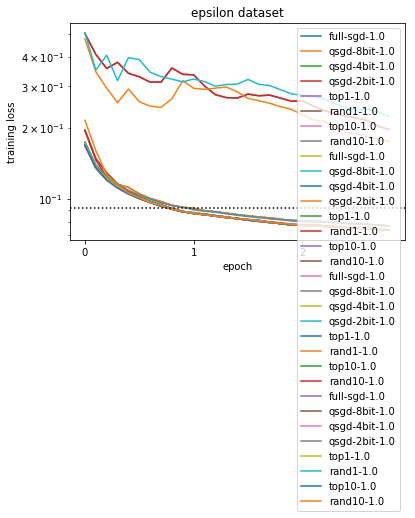

In [68]:
types = ["full-sgd", "qsgd-8bit", "qsgd-4bit", "qsgd-2bit", "top1", "rand1", "top10", "rand10"]
lrs = [0.01, 0.1, 1., 10.]

def plot_epsilon(ax):
    data = unpickle_dir('../results/rcv1-parameters-search')
#     data['params'] = data['params'][6:6+len(ll)]
#     data['results'] = data['results'][6:6+len(ll)]
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
#         if 'full-sgd' not in p.name and 'qsgd-2bit' not in p.name:
        if '-1.0' not in p.name:
#         if 'rand1-' not in p.name:
            continue
    
        loss =loss[1:-1]
        
        for i, typp in enumerate(types):
            if typp in p.name:
                break
        
        # ,
        ax.plot(np.arange(len(loss)) / 10, loss, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axhline(0.091589235035380689, color='black', linestyle=':', label='baseline')


#     ax.set_ylim([0.06, .1]);
#     ax.set_xlim([0, 3]);
    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

In [70]:
data = unpickle_dir('../results/sept/eps-quantized-search')

In [116]:
import pandas as pd

res_and_infos = []
names = []
lrs = []
for p, res in zip(data['params'], data['results']):
    lr = p.initial_lr
    name = str(p)[:-(len(str(lr)) + 1)]
    names.append(name)
    lrs.append(lr)
    res_and_infos.append((name, lr, res[1][:-1]))

names = sorted(list(set(names)))
lrs = sorted(list(set(lrs)))

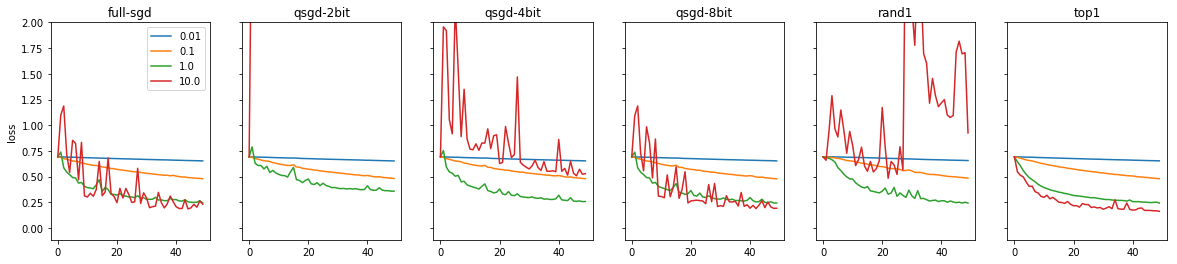

In [128]:
f, axarr = plt.subplots(1, len(names), figsize=(20,4), sharey=True)

for name, lr, loss in res_and_infos:
    ax = axarr[names.index(name)]
    idx = lrs.index(lr)
    ax.plot(loss, "C{}".format(idx), label=str(lr))
    
for name, ax in zip(names, axarr):
    ax.set_title(name)
    ax.set_ylim(top=2.)

axarr[0].set_ylabel('loss')
axarr[0].legend();
f.savefig('eps-quantized-search.pdf')

In [98]:
dff = df.pivot(index='algo', columns='lr', values='loss')
dff

lr,0.01,0.1,1.0,10.0
algo,,,,
full-sgd,0 0.693199 1 0.692177 2 0.691137 3...,0 0.693199 1 0.687751 2 0.674901 3...,0 0.693199 1 0.738892 2 0.586597 3...,0 0.693199 1 1.098785 2 1.187298 3...
qsgd-2bit,0 0.693199 1 0.692159 2 0.691209 3...,0 0.693199 1 0.687738 2 0.676176 3...,0 0.693199 1 0.789381 2 0.630933 3...,0 0.693199 1 3.595221 2 3.099186 3...
qsgd-4bit,0 0.693199 1 0.692169 2 0.691117 3...,0 0.693199 1 0.687802 2 0.674951 3...,0 0.693199 1 0.753634 2 0.592565 3...,0 0.693199 1 1.956116 2 1.918954 3...
qsgd-8bit,0 0.693199 1 0.692176 2 0.691137 3...,0 0.693199 1 0.687746 2 0.674912 3...,0 0.693199 1 0.738508 2 0.586662 3...,0 0.693199 1 1.091744 2 1.187289 3...
rand1,0 0.693199 1 0.693103 2 0.692708 3...,0 0.693199 1 0.692319 2 0.688867 3...,0 0.693199 1 0.683468 2 0.679079 3...,0 0.693199 1 0.659076 2 0.940995 3...
top1,0 0.693199 1 0.692628 2 0.691650 3...,0 0.693199 1 0.687664 2 0.680166 3...,0 0.693199 1 0.646039 2 0.606460 3...,0 0.693199 1 0.548666 2 0.513439 3...


In [100]:
dff.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [85]:
import seaborn as sns

In [101]:
g = sns.FacetGrid(dff, col="algo", hue="lr", col_wrap=4)
g.map(sns.pointplot, "loss",  "loss");

KeyError: 'lr'

[Parameter('full-sgd'), Parameter('top1'), Parameter('rand1'), Parameter('qsgd-8bit'), Parameter('qsgd-4bit'), Parameter('qsgd-2bit')]


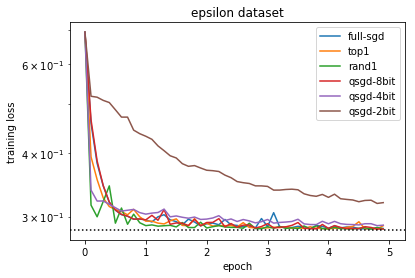

In [130]:
types = ["full-sgd", "qsgd-8bit", "qsgd-4bit", "qsgd-2bit", "top1", "rand1", "top10", "rand10"]
lrs = [0.01, 0.1, 1., 10.]

def plot_epsilon(ax):
    data = unpickle_dir('../results/sept/eps-quantized')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
        ax.plot(np.arange(len(loss)) / 10, loss, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axhline(0.28241561280203953, color='black', linestyle=':', label='baseline')


    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1)
plot_epsilon(ax)

[Parameter('full-sgd'), Parameter('full-sgd-no-shift'), Parameter('top1-no-memory'), Parameter('top1'), Parameter('top1-no-shift'), Parameter('rand1-d'), Parameter('rand1-no-shift'), Parameter('rand2-d'), Parameter('rand2-d/k'), Parameter('rand2-no-shift'), Parameter('rand3-d'), Parameter('rand3-d/k'), Parameter('rand3-no-shift')]


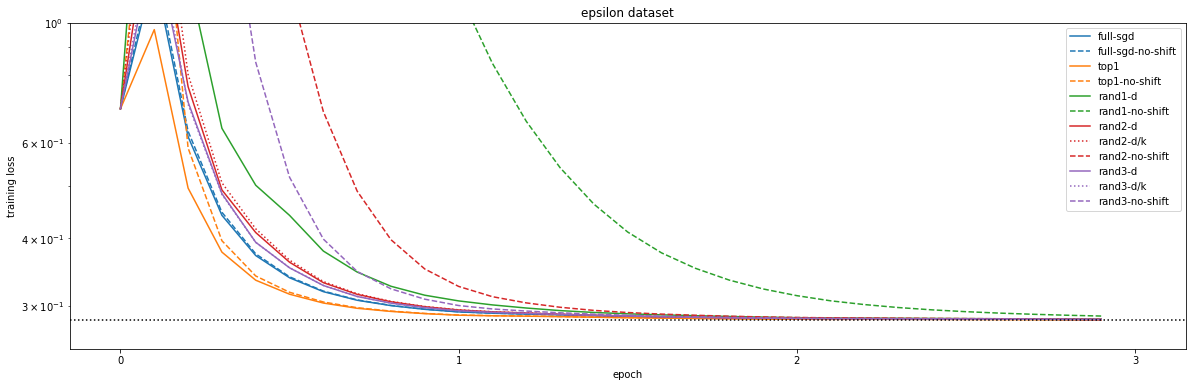

In [143]:
def plot_epsilon(ax):
    data = unpickle_dir('../results/sept/eps-th')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
#         if 'd/k' in str(p) or 'top1-no' in str(p):
#             continue
        if 'no-memory' in str(p):
            continue
        sty = 'C0' if 'sgd' in str(p) else 'C1' if 'top' in str(p) else 'C2' if 'rand1' in str(p) else 'C3' if 'rand2' in str(p) else 'C4'
        sty += '--' if 'no-shift' in str(p) else ':' if 'd/k' in str(p) else '-'
        ax.plot(np.arange(len(loss)) / 10, loss, sty, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axhline(0.28241561280203953, color='black', linestyle=':', label='baseline')

    ax.set_ylim(0.25, 1)

    ax.set_title('epsilon dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1, figsize=(20,6))
plot_epsilon(ax)

[Parameter('full-sgd'), Parameter('top1'), Parameter('rand1'), Parameter('rand10'), Parameter('qsgd-8bit'), Parameter('qsgd-4bit'), Parameter('qsgd-2bit')]


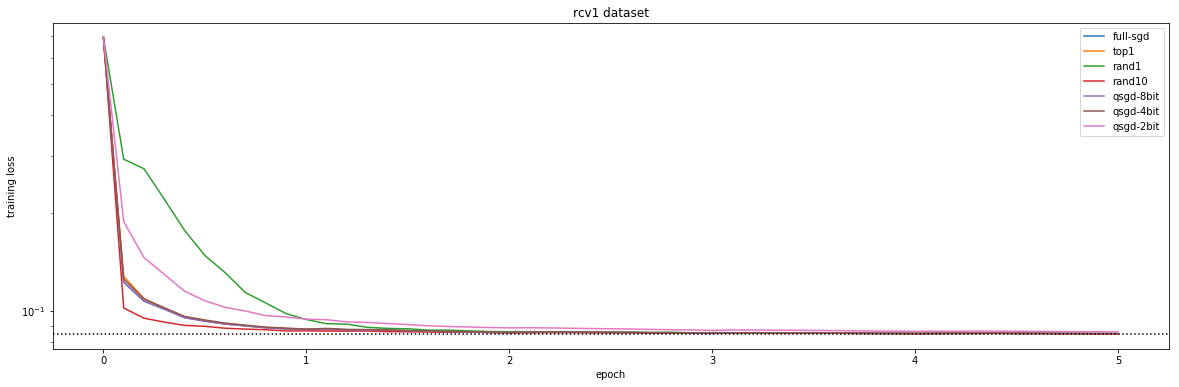

In [151]:
def plot_rcv(ax):
    data = unpickle_dir('../results/sept/rcv-quantized')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
#         if 'd/k' in str(p) or 'top1-no' in str(p):
#             continue
#         if 'rand10' in str(p):
#             continue
#         sty = 'C0' if 'sgd' in str(p) else 'C1' if 'top' in str(p) else 'C2' if 'rand1' in str(p) else 'C3' if 'rand10' in str(p) else 
#         'C4' if 
        sty = ""
        sty += '--' if 'no-shift' in str(p) else ':' if 'd/k' in str(p) else '-'
        ax.plot(np.arange(len(loss)) / 10, loss, sty, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axhline(0.084773803386077096, color='black', linestyle=':', label='baseline')

#     ax.set_ylim(0.07, 1)

    ax.set_title('rcv1 dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1, figsize=(20,6))
plot_rcv(ax)

[Parameter('full-sgd'), Parameter('full-sgd-no-shift'), Parameter('top1'), Parameter('top1-no-shift'), Parameter('top10'), Parameter('top10-no-shift'), Parameter('rand10'), Parameter('rand10-no-shift'), Parameter('rand20'), Parameter('rand20-no-shift'), Parameter('rand30'), Parameter('rand30-no-shift')]


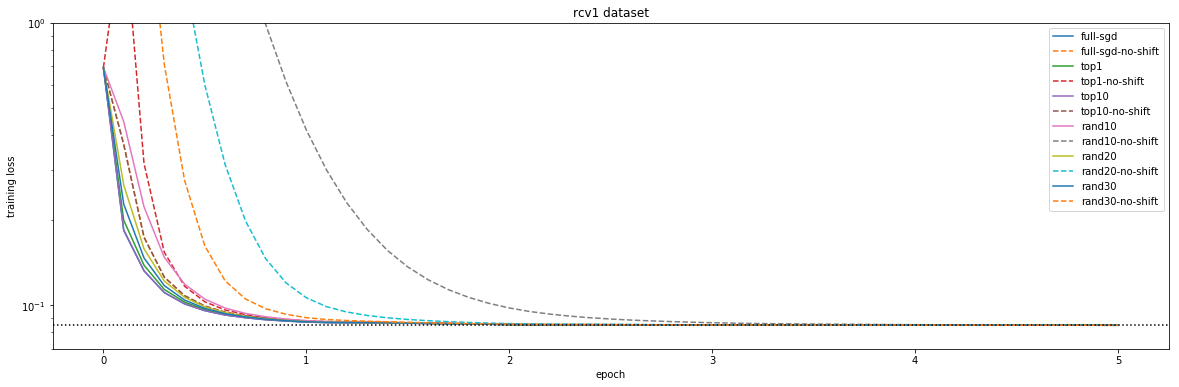

In [153]:
def plot_rcv(ax):
    data = unpickle_dir('../results/sept/rcv-th')
    print(data['params'])

    markers_every = 20

    for p, loss in zip(data['params'], map(lambda x: x[1], data['results'])):
#         if 'd/k' in str(p) or 'top1-no' in str(p):
#             continue
#         if 'rand10' in str(p):
#             continue
#         sty = 'C0' if 'sgd' in str(p) else 'C1' if 'top' in str(p) else 'C2' if 'rand1' in str(p) else 'C3' if 'rand10' in str(p) else 
#         'C4' if 
        sty = ""
        sty += '--' if 'no-shift' in str(p) else ':' if 'd/k' in str(p) else '-'
        ax.plot(np.arange(len(loss)) / 10, loss, sty, label=p.name, markevery=markers_every)

    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axhline(0.084773803386077096, color='black', linestyle=':', label='baseline')

    ax.set_ylim(0.07, 1)

    ax.set_title('rcv1 dataset');
    ax.set_xlabel('epoch');
    ax.set_ylabel('training loss');
    if LOG_SCALE:
        ax.set_yscale("log")

fig, ax = plt.subplots(1, figsize=(20,6))
plot_rcv(ax)